In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv("data/news_prices.csv", index_col=0, parse_dates=[0])
df['profit'] = -df['profit']

In [85]:
df = df[df['source_id'].notnull()]

In [79]:
plt.style.use('ggplot')

In [80]:

COLOR = 'white'

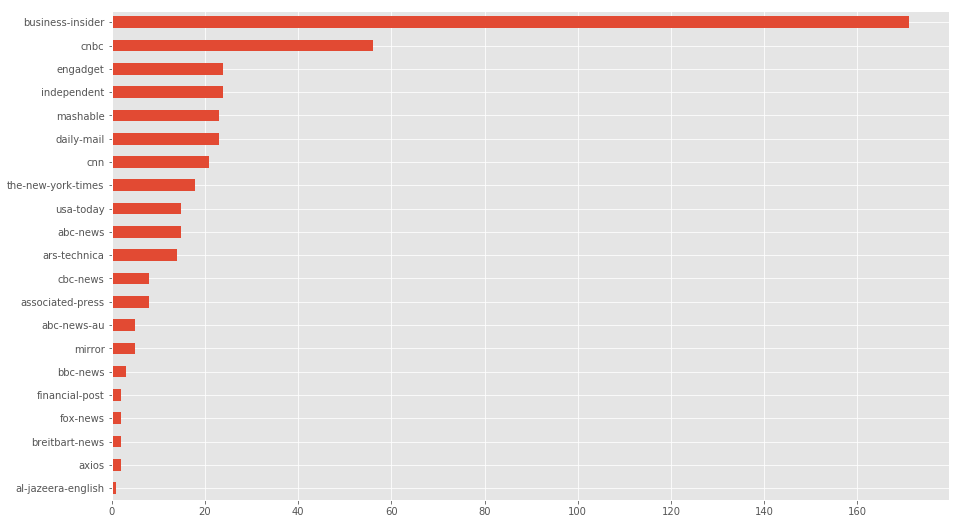

In [81]:
plt.figure(figsize=(15,9))
df['source_id'].value_counts().sort_values().plot(kind="barh")
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.savefig('zrodla_dane.png', transparent=True, pad_inches=2, bbox_inches = 'tight', dpi=300)

In [118]:
df_train = df.iloc[:250]
df_test = df.iloc[250:]

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_train['title_clean'])
X_test_counts = count_vect.transform(df_test['title_clean'])

In [135]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
tf_transformer = TfidfTransformer(use_idf=False).fit(X_test_counts)
X_test_tf = tf_transformer.transform(X_test_counts)
X_train_tf.shape

(250, 1119)

In [136]:
df['win'] = df['profit'] > 0

In [154]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf.toarray(), df_train['win'])

In [155]:
df['profit'].sum()

-309.0100000000002

In [156]:
df_train['profit'].values[clf.predict(X_train_tf.toarray())].sum()

25.925000000000125

In [167]:
df_test['profit'].mean()

-0.8415104166666684

In [169]:
df_test['profit'].values[clf.predict_proba(X_test_tf.toarray())[:,1] <
                         clf.predict_proba(X_test_tf.toarray())[:,1].mean()].mean()

-0.9536538461538471